In [1]:
# import basic libraries
import pandas as pd
import numpy as np


#visualization library
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# getting dataset
df_train=pd.read_excel(r'C:\Users\DELL\Documents\Flight_Ticket_Participant_Datasets\Data_Train.xlsx')
df_test= pd.read_excel(r'C:\Users\DELL\Documents\Flight_Ticket_Participant_Datasets\Test_set.xlsx')

In [3]:
#checking dataset
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


We can see that in test data we don't have price column, as we need to predict that after finalizing the model.

In [5]:
print("\n Dimension of Train Dataset : ",df_train.shape)
print("\n Dimension of Test Dataset : ",df_test.shape)


 Dimension of Train Dataset :  (10683, 11)

 Dimension of Test Dataset :  (2671, 10)


In [6]:
#collecting info about our dataset
print("\n Info about Train Dataset : \n")
df_train.info()
print("\n==========================================================================\n")
print("\n Info about Test Dataset : \n") 
df_test.info()


 Info about Train Dataset : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB



 Info about Test Dataset : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  

In [7]:
print("\n--------------------------Train Dataset-----------------------------------\n")
print(df_train.isnull().sum())

print("\n---------------------------Test Dataset-----------------------------------\n")
print(df_test.isnull().sum())


--------------------------Train Dataset-----------------------------------

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

---------------------------Test Dataset-----------------------------------

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


 We can see that we have one null value in Total_Stops and Route in train data set and both of them are Object type so we will replace them with the mode .
 

In [8]:
# Imputing Null values with mode
df_train['Total_Stops']=df_train['Total_Stops'].fillna(df_train['Total_Stops'].mode()[0])
df_train['Route']=df_train['Route'].fillna(df_train['Route'].mode()[0])

In [9]:
# checking data one more time
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Now our data looks good, we are safe to move ahead


In [10]:
# we are combining both the dataset , so that we can perform feature engineering in both the dataset.
final_df=df_train.append(df_test)
final_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [11]:
final_df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
dtype: int64

The null values for price is because we merge two dataset

# Feature Engineering

In [12]:
# splitting date as to make Date_of_Journey a useful information
final_df['Date']= final_df['Date_of_Journey'].apply(lambda x:x.split('/')[0])
final_df['Month']=final_df['Date_of_Journey'].apply(lambda x :x.split('/')[1])
final_df['Year']=final_df['Date_of_Journey'].apply(lambda x :x.split('/')[2])

final_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019


In [13]:
#changing their type to integer
final_df['Date']=final_df['Date'].astype(int)
final_df['Month']=final_df['Month'].astype(int)
final_df['Year']=final_df['Year'].astype(int)

#drop Date_of_Journey
final_df.drop('Date_of_Journey',axis=1, inplace= True)

In [14]:
final_df.head(2)   # checking dataset

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019


In [15]:
# Arrival time feature engineering
final_df['Arrival_Time']=final_df['Arrival_Time'].apply(lambda x:x.split(' ')[0])
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019


In [16]:
final_df['Arrival_hour']=final_df['Arrival_Time'].apply(lambda x:x.split(':')[0])
final_df['Arrival_min']=final_df['Arrival_Time'].apply(lambda x:x.split(':')[1])

#coverting to int type
final_df['Arrival_hour']=final_df['Arrival_hour'].astype(int)
final_df['Arrival_min']= final_df['Arrival_min'].astype(int)

#dropping Arrival_Time
final_df.drop('Arrival_Time', axis=1, inplace= True)

In [17]:
final_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15


In [18]:
# Same for Dep_Time

final_df['Dep_hour']=final_df['Dep_Time'].apply(lambda x:x.split(':')[0])
final_df['Dep_min']=final_df['Dep_Time'].apply(lambda x:x.split(':')[1])

#coverting to int type
final_df['Dep_hour']=final_df['Dep_hour'].astype(int)
final_df['Dep_min']= final_df['Dep_min'].astype(int)

#dropping Arrival_Time
final_df.drop('Dep_Time', axis=1, inplace= True)

#checking dataset
final_df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50


In [249]:
# we can see that their is one null value in Route and Total_stops, let's check it
final_df[final_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins


In [20]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [21]:
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop': 0, '1 stop':1, '2 stops': 2, '3 stops': 3, '4 stops':4})

In [22]:
final_df.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5


Since we already got total number of Stops we can go ahead and drop Route Column

In [23]:
# Dropping Route Column
final_df.drop('Route', axis=1, inplace= True)

final_df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50


In [24]:
final_df.nunique()

Airline              12
Source                5
Destination           6
Duration            374
Total_Stops           5
Additional_Info      10
Price              1870
Date                 10
Month                 4
Year                  1
Arrival_hour         24
Arrival_min          12
Dep_hour             24
Dep_min              12
dtype: int64

In [25]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Duration         13354 non-null  object 
 4   Total_Stops      13354 non-null  int64  
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
 7   Date             13354 non-null  int32  
 8   Month            13354 non-null  int32  
 9   Year             13354 non-null  int32  
 10  Arrival_hour     13354 non-null  int32  
 11  Arrival_min      13354 non-null  int32  
 12  Dep_hour         13354 non-null  int32  
 13  Dep_min          13354 non-null  int32  
dtypes: float64(1), int32(7), int64(1), object(5)
memory usage: 1.2+ MB


In [26]:
# Duration

# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(final_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

Duration_hours = []
Duration_mins = []
for i in range(len(duration)):
    Duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    Duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from data

In [28]:
# Adding duration_hours and duration_mins list to train_data dataframe

final_df["Duration_hours"] = Duration_hours
final_df["Duration_mins"] = Duration_mins

In [29]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [30]:
# Dropping Duration column
final_df.drop('Duration', axis=1,inplace= True)

In [31]:
# checking the dataset 
final_df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,7,25


In [33]:
final_df.shape

(13354, 15)

In [35]:
final_df.dtypes

Airline             object
Source              object
Destination         object
Total_Stops          int64
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Arrival_hour         int32
Arrival_min          int32
Dep_hour             int32
Dep_min              int32
Duration_hours       int64
Duration_mins        int64
dtype: object

We can observe that 'Airline', 'Source', 'Destination' and 'Additinal_Info' are the categorical columns while rest are numerical columns, we need to convert these to numerical column. 

In [37]:
#Since categorical column has object datatype we will print all of the object data types and their unique values.

for column in final_df.columns:
    if final_df[column].dtype == object:    #checking datatype for each column if it is 'object'
        print(str(column) + ' : ' + str(final_df[column].unique()))   #unique() gives all the unique value of that column 
        print(final_df[column].value_counts())  # value_counts() count the number belongs to different class in that column
        print("\n _________________________________________________________________\n")

Airline : ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

 _________________________________________________________________

Source : ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

 _______________________

Since the categorical columns are nonimal data, we can use Label Encoder or One Hot Encoder. However let's do some visualization in order to get clear picture of our dataset. But before that We will separate, Train and test data again.

In [39]:
# separating train dataset and test data set

data_train = final_df.iloc[:10683,:]
data_test = final_df.iloc[10683:,:]

In [40]:
print("Featured engineered train dataset : ",data_train.shape)
print("Featured Engineered test dataset : ", data_test.shape)

Featured engineered train dataset :  (10683, 15)
Featured Engineered test dataset :  (2671, 15)


In [41]:
# Checking info
print(" Info of Train dataset \n")
data_train.info()

print("\n---------------------------------------------------------------\n")
print("Info of test dataset\n")
data_test.info()

 Info of Train dataset 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Source           10683 non-null  object 
 2   Destination      10683 non-null  object 
 3   Total_Stops      10683 non-null  int64  
 4   Additional_Info  10683 non-null  object 
 5   Price            10683 non-null  float64
 6   Date             10683 non-null  int32  
 7   Month            10683 non-null  int32  
 8   Year             10683 non-null  int32  
 9   Arrival_hour     10683 non-null  int32  
 10  Arrival_min      10683 non-null  int32  
 11  Dep_hour         10683 non-null  int32  
 12  Dep_min          10683 non-null  int32  
 13  Duration_hours   10683 non-null  int64  
 14  Duration_mins    10683 non-null  int64  
dtypes: float64(1), int32(7), int64(3), object(4)
memory usage: 1.0+ MB

-----------

We can observe that test dataset has all null values for price column, let's go ahaed and delete it, cause we don't have any Price column in real dataset of test data

In [42]:
# dropping Price from test dataset
data_test.drop('Price', axis=1, inplace= True)
data_test.shape

(2671, 14)

In [44]:
data_train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

Since 'No info' and 'No Info' is same thing, we will change 'No Info' to 'No Info'.

In [46]:
data_train['Additional_Info'].replace('No Info','No info',inplace=True)

In [47]:
# chceking if it's done or not
data_train['Additional_Info'].value_counts()

No info                         8348
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

So far data looks good, let's do some Visualization for our train dataset. 



# EDA

Univariate Analysis

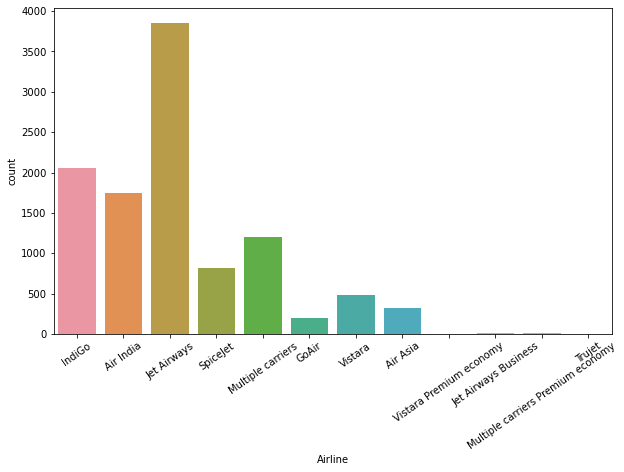

In [59]:
plt.figure(figsize=(10,6))
sns.countplot('Airline', data=data_train)
plt.xticks(rotation=35)
plt.show()

Maximum data is from Jet Airways

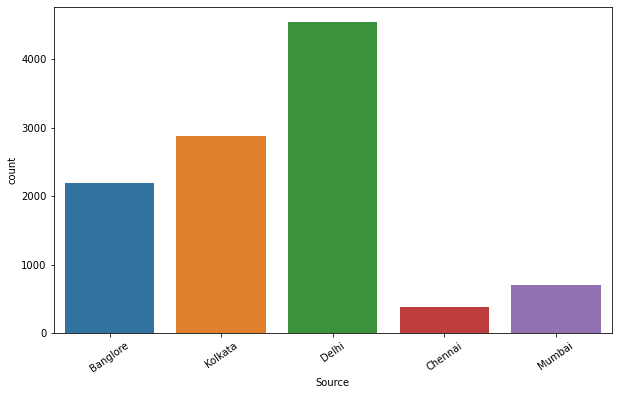

In [52]:
plt.figure(figsize=(10,6))
sns.countplot('Source', data=data_train)
plt.xticks(rotation=35)
plt.show()

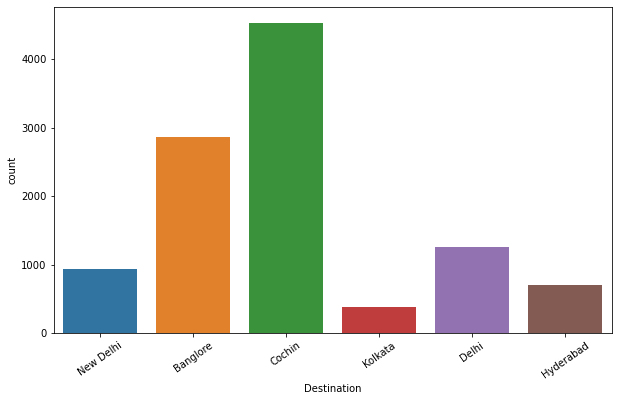

In [54]:
plt.figure(figsize=(10,6))
sns.countplot('Destination', data=data_train)
plt.xticks(rotation=35)
plt.show()

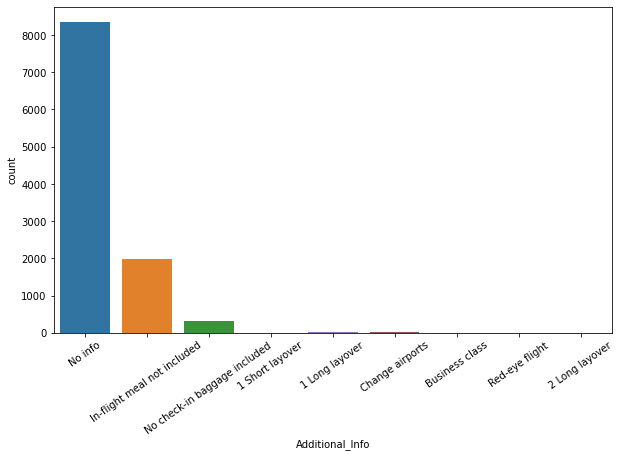

In [55]:
plt.figure(figsize=(10,6))
sns.countplot('Additional_Info', data=data_train)
plt.xticks(rotation=35)
plt.show()

We can observe that all the above graphs are count plot for categorical columns, which shows us how our data is distributed over various classes of the features.

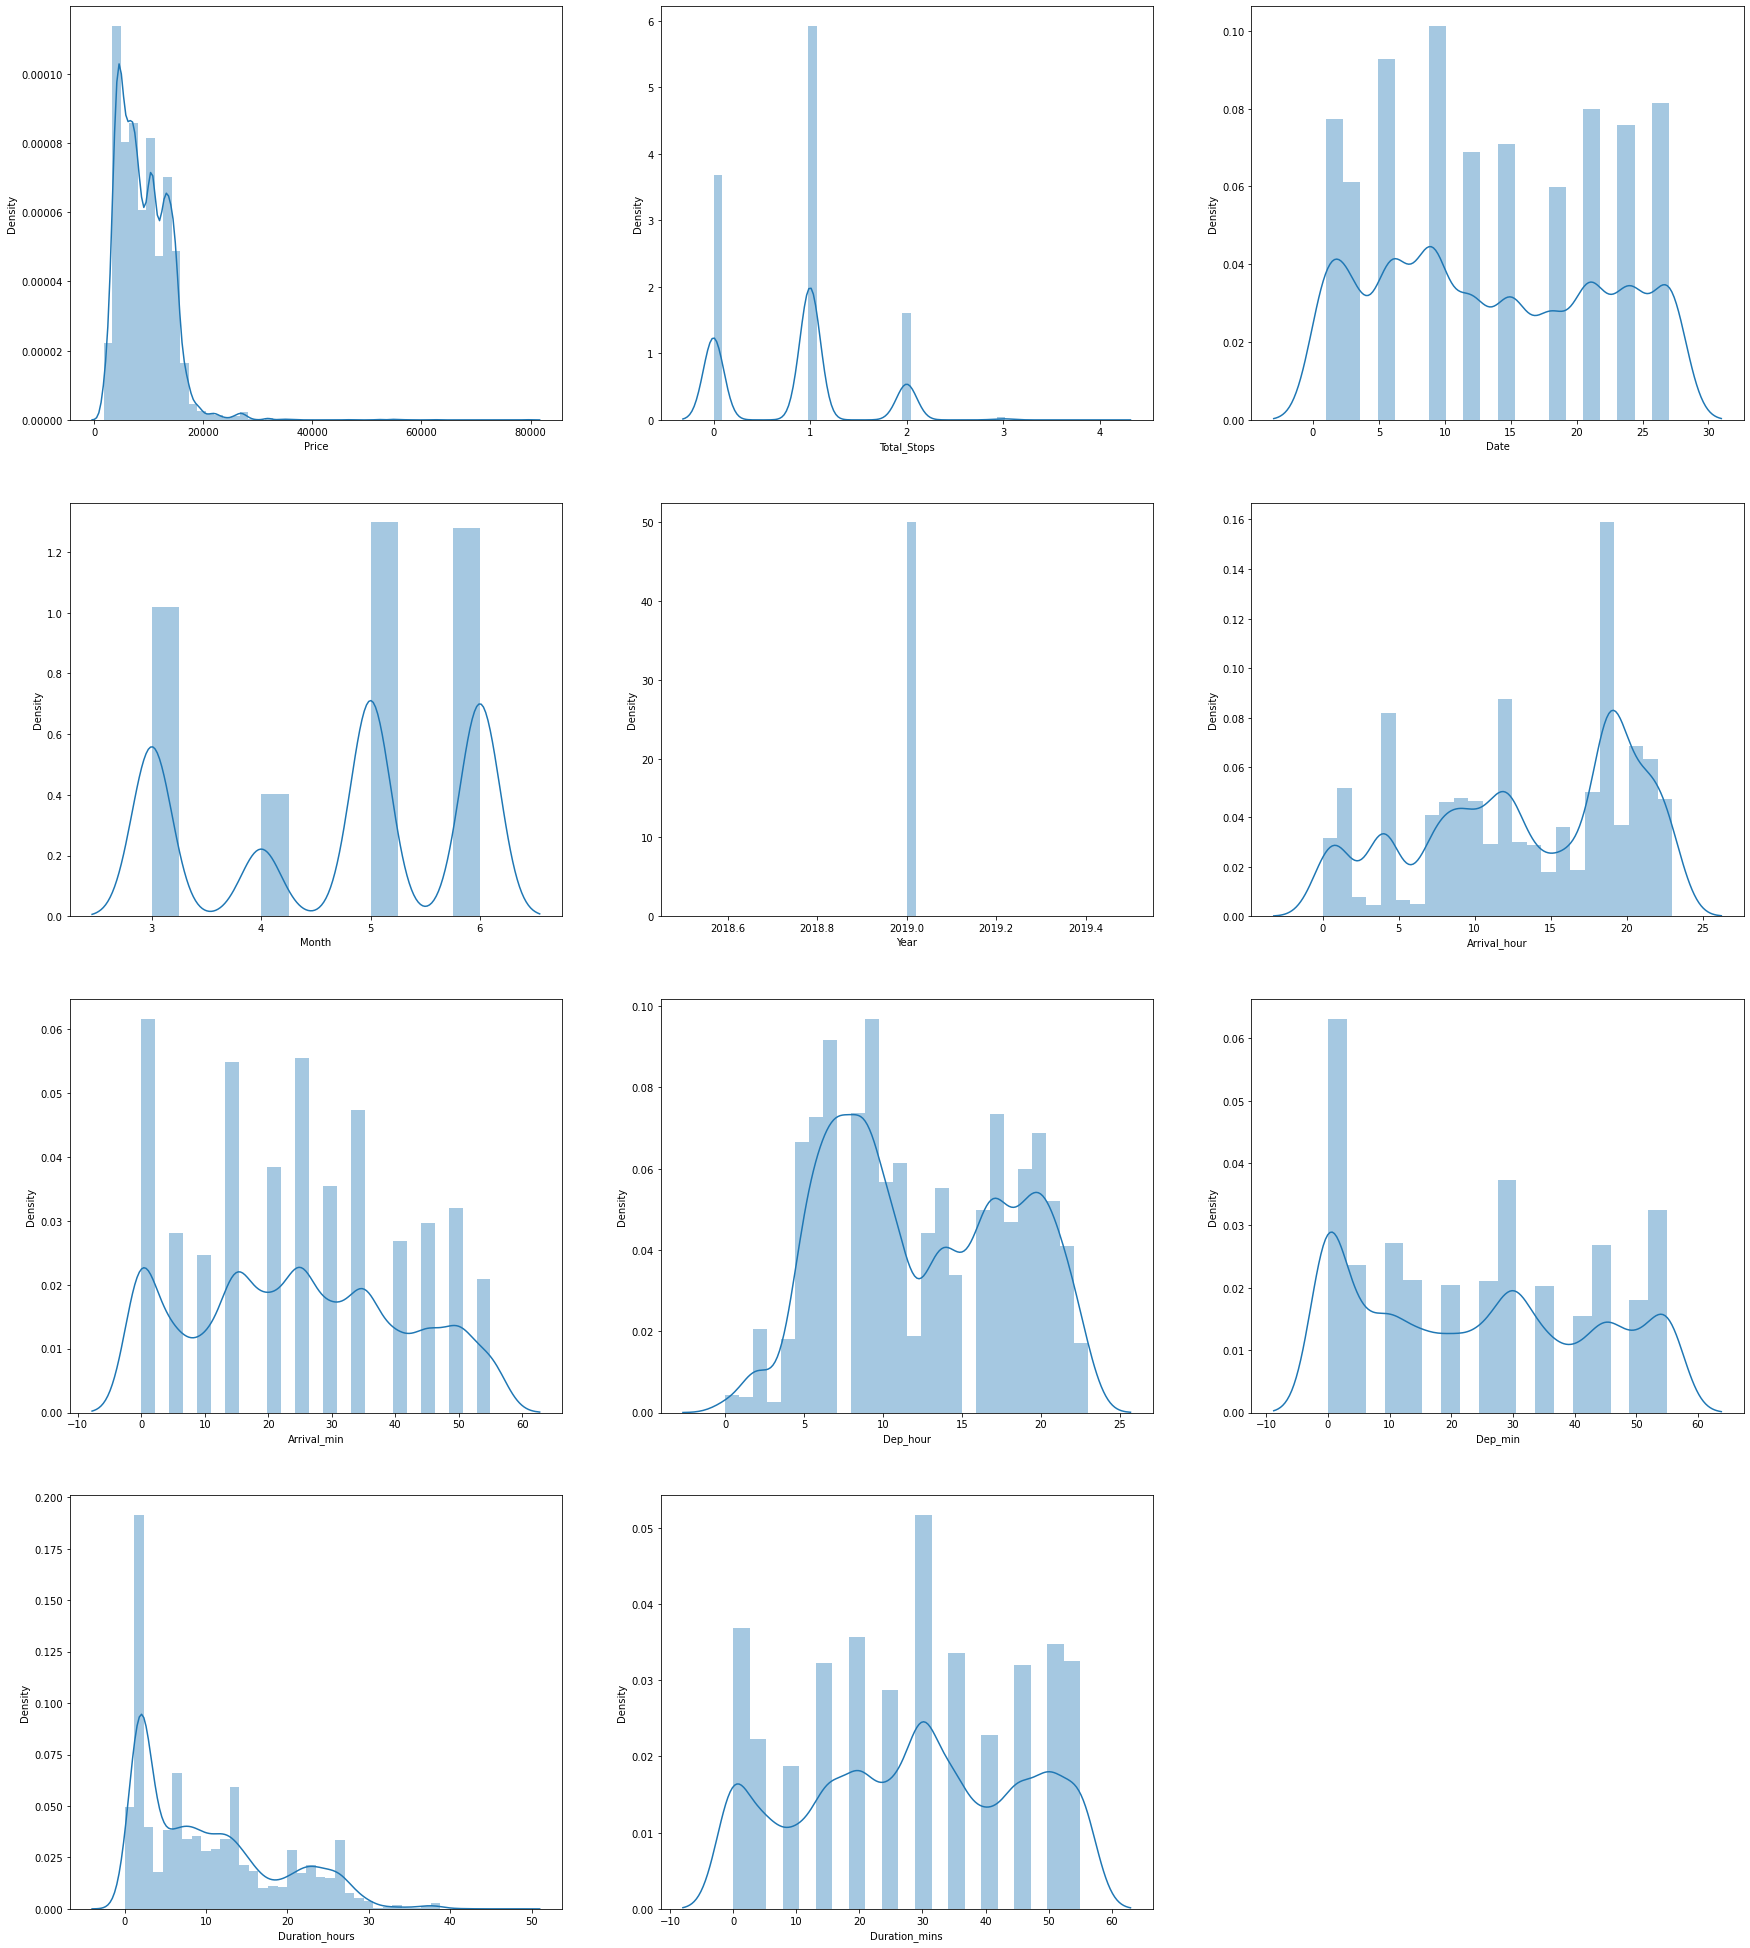

In [58]:
Num_data=['Price','Total_Stops','Date','Month','Year','Arrival_hour',
          'Arrival_min','Dep_hour','Dep_min','Duration_hours','Duration_mins']

# let's see how data is distributed among each column.
plt.figure(figsize=(30,35), facecolor='white')
plotnumber=1
for column in data_train[Num_data]:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data_train[column])
    plotnumber+=1
plt.show()

We can observe that Year column has only one value i.e.2019 , we can drop this column as it is same for entire dataset.

We also observe that except Price all other data columns has discrete value.

Let's move ahead and do some Multivariate analysis to see how data is related.

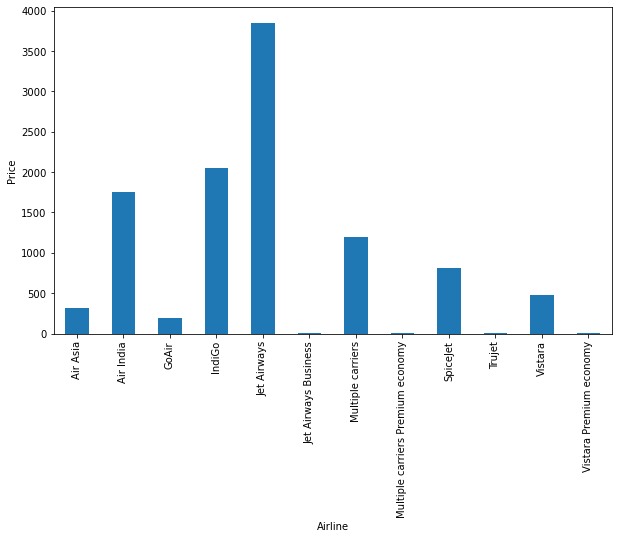

In [61]:
plt.figure(figsize=(10,6))
data_train.groupby('Airline').Price.count().plot.bar(ylim=0)
plt.ylabel('Price')
plt.show()

We can observe that jet airways airlines are pricey than others

<Figure size 720x432 with 0 Axes>

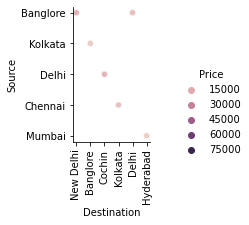

In [71]:
plt.figure(figsize=(10,6))
sns.pairplot(x_vars=['Destination'], y_vars='Source', data=data_train, hue='Price')
plt.xticks(rotation=90)
plt.show()

We can observe that Banglore-Delhi flights has higher price, while Mumbai Hyderabad is comparitively cheaper.

<Figure size 720x432 with 0 Axes>

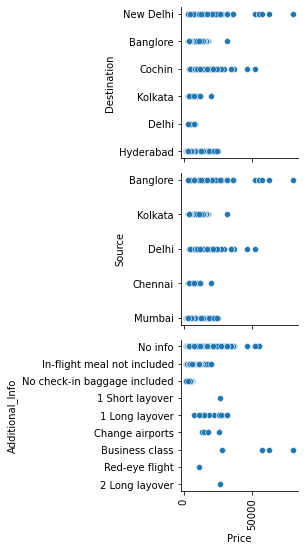

In [73]:
plt.figure(figsize=(10,6))
sns.pairplot(y_vars=['Destination','Source','Additional_Info'], x_vars='Price', data=data_train)
plt.xticks(rotation=90)
plt.show()

We can observe that Flight Tickets prices are highest if Destination is New Delhi or Source is Banglore. It obvious Business class charges are highest.

Its interesting to know that No chcek-in baggage included flights has low tickect prices.

In [74]:
# drop Year column
data_train.drop('Year', axis=1, inplace=True)
data_test.drop('Year', axis=1, inplace =True)

print("Train  dataset dimension : ", data_train.shape)
print("Test dataset dimension : ", data_test.shape)

Train  dataset dimension :  (10683, 14)
Test dataset dimension :  (2671, 13)


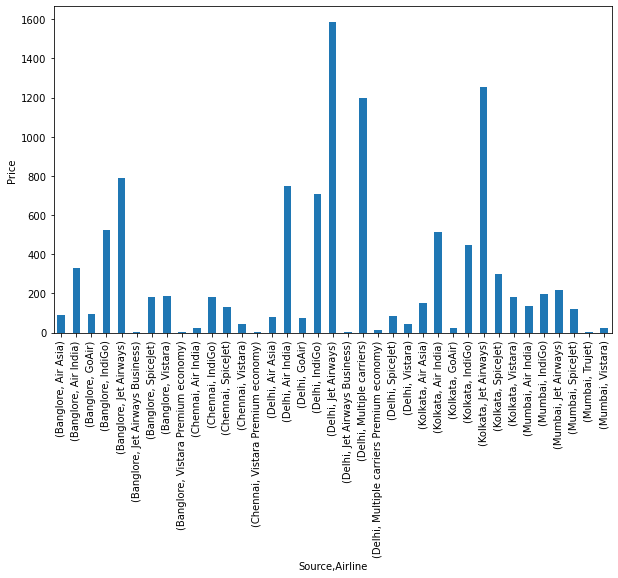

In [79]:
plt.figure(figsize=(10,6))
data_train.groupby(['Source','Airline']).Price.count().plot.bar(ylim=0)
plt.ylabel('Price')
plt.show()

Delhi Jet Airways has highest price, our previous observation about airline and source stands correct

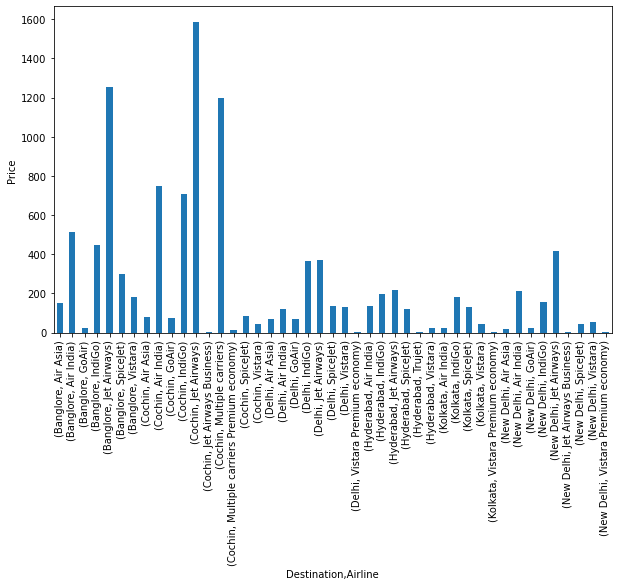

In [78]:
plt.figure(figsize=(10,6))
data_train.groupby(['Destination','Airline']).Price.count().plot.bar(ylim=0)
plt.ylabel('Price')
plt.show()

Cochin Jetairways shows highest price, i.e Delhi Cochin Jet airways has highest ticket price.

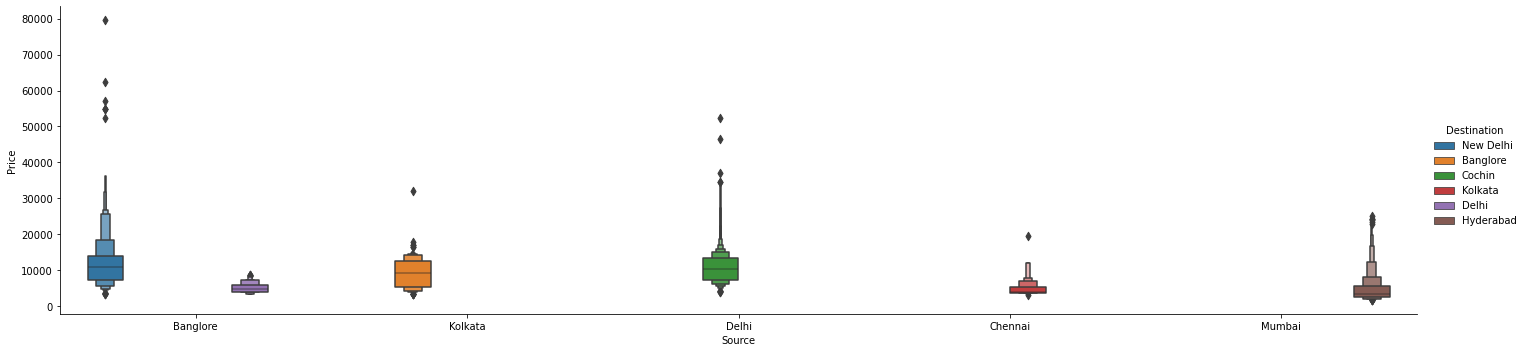

In [86]:
sns.catplot(x='Source', y='Price', data=data_train, hue='Destination', kind='boxen', height=5, aspect=4)

The mean of Delhi Cochin are higher then rest of the ticket price

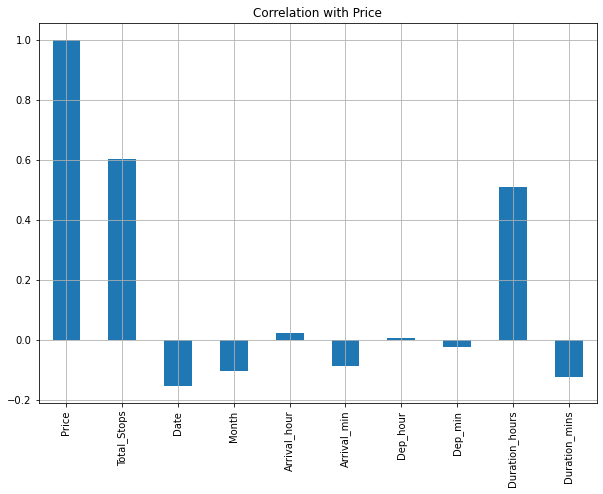

In [88]:
# let's see how numerical features are related to price
num_data=['Price','Total_Stops','Date','Month','Arrival_hour',
          'Arrival_min','Dep_hour','Dep_min','Duration_hours','Duration_mins']
data_train[num_data].corrwith(data_train.Price).plot(kind='bar', grid= True, figsize=(10,7),
                                                  title="Correlation with Price")

plt.show()

Ticket price of flight is highly correlated with Total_stops and least correlated with Dep_hour. We can see both positive and negative correlation between Price and rest numerical variables.



# Encoding

In [89]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

# we will encode, Airline and Additional Info using Label encoder
# Source and Destination using get dummies
# we will encode categorical data of both train dataset and test dataset

data_train['Airline']=lab_enc.fit_transform(data_train['Airline'])
data_train['Additional_Info']= lab_enc.fit_transform(data_train['Additional_Info'])

data_test['Airline']=lab_enc.fit_transform(data_test['Airline'])
data_test['Additional_Info']= lab_enc.fit_transform(data_test['Additional_Info'])

<AxesSubplot:title={'center':'Correlation with Price'}>

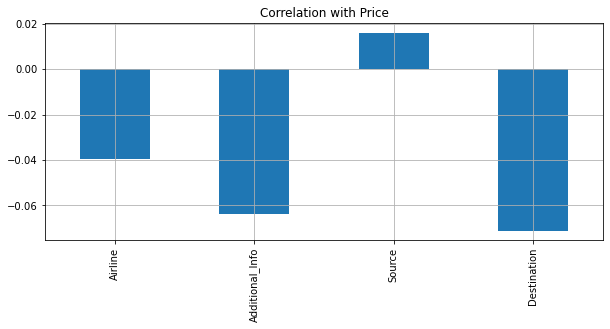

In [141]:
cat_data=['Airline','Additional_Info','Source','Destination']
data_train[cat_data].corrwith(data_train.Price).plot(kind='bar', grid= True, figsize=(10,4),
                                                  title="Correlation with Price")


We can see that Price is positively correlated with Source column among all other categorical columns. While rest all the columns including Airline, Additional_Info and destination are negatively correlated with price, but there correlation is really strong.

In [90]:
# One Hot encoder or get dummies on Destination and Source
# we are trying this as we want to see if this encoding works better or not. 
# WE will decide wheather we will go with this encoded dtaset or do we need to perform Label Encoding

Destination = data_train[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [91]:
Source=data_train[['Source']]
Source=pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [92]:
# Concatenate Dataframe
train_data = pd.concat([data_train,Source, Destination], axis = 1)
train_data.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Arrival_hour,Arrival_min,...,Duration_mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3,Banglore,New Delhi,0,7,3897.0,24,3,1,10,...,50,0,0,0,0,0,0,0,0,1
1,1,Kolkata,Banglore,2,7,7662.0,1,5,13,15,...,25,0,0,1,0,0,0,0,0,0


In [93]:
train_data.drop(['Source','Destination'], axis=1, inplace= True)
train_data.head(2)

,Airline,Total_Stops,Additional_Info,Price,Date,Month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,...,Duration_mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3,0,7,3897.0,24,3,1,10,22,20,...,50,0,0,0,0,0,0,0,0,1
1,1,2,7,7662.0,1,5,13,15,5,50,...,25,0,0,1,0,0,0,0,0,0


In [94]:
# let's perform same steps for test dataset
Destination = data_test[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

Source = data_test[["Source"]]
Source = pd.get_dummies(Source, drop_first = True)

# Concatenate Dataframe
test_data = pd.concat([data_test,Source, Destination], axis = 1)

# Drop column Source And Destination
test_data.drop(['Source','Destination'], axis=1, inplace=True)
test_data.head(2)


,Airline,Total_Stops,Additional_Info,Date,Month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4,1,5,6,6,4,25,17,30,10,55,0,1,0,0,1,0,0,0,0
1,3,1,5,12,5,10,20,6,20,4,0,0,0,1,0,0,0,0,0,0


In [95]:
# Checking Dimension
print("Train dataset dimension : ", train_data.shape)
print("Test Dataset dimension : ", test_data.shape)

Train dataset dimension :  (10683, 21)
Test Dataset dimension :  (2671, 20)


Our data set looks good, Let's chcek their type once before moving ahead

In [96]:
print("Info of Train dataset\n")
train_data.info()
print("\n--------------------------------------------------------------\n")
print("\n Info of test dataset\n")
test_data.info()

Info of Train dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10683 entries, 0 to 10682
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airline                10683 non-null  int32  
 1   Total_Stops            10683 non-null  int64  
 2   Additional_Info        10683 non-null  int32  
 3   Price                  10683 non-null  float64
 4   Date                   10683 non-null  int32  
 5   Month                  10683 non-null  int32  
 6   Arrival_hour           10683 non-null  int32  
 7   Arrival_min            10683 non-null  int32  
 8   Dep_hour               10683 non-null  int32  
 9   Dep_min                10683 non-null  int32  
 10  Duration_hours         10683 non-null  int64  
 11  Duration_mins          10683 non-null  int64  
 12  Source_Chennai         10683 non-null  uint8  
 13  Source_Delhi           10683 non-null  uint8  
 14  Source_Kolkata         10683 no

Our datasets are looking good, all the categorical columns are converted into numerical columns, no null values are present. We are safe to move ahead.

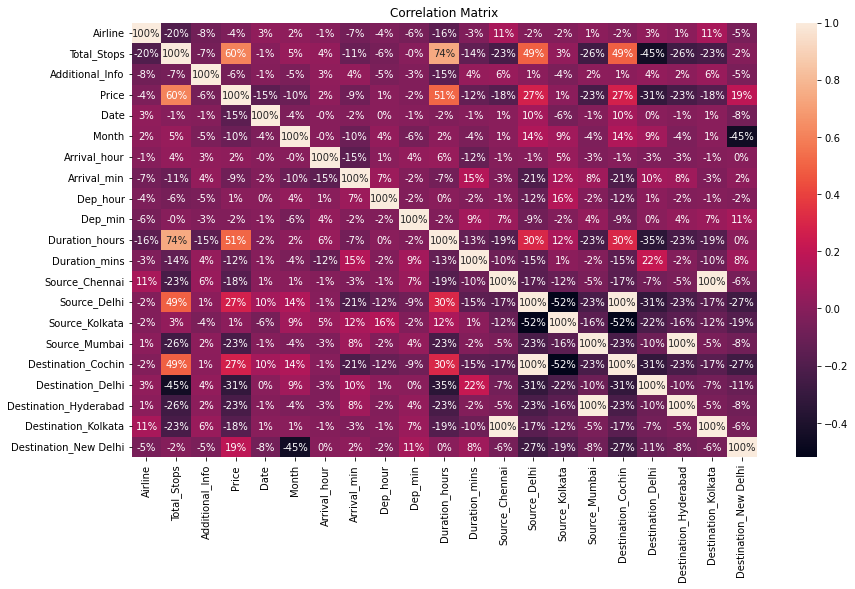

In [98]:
# Correlation Matrix

# let's Visualize it using heatmap
plt.figure(figsize=(14,8))
sns.heatmap(train_data.corr(), annot= True, fmt='.0%')
plt.title("Correlation Matrix")
plt.show()

We can observe that some of the source and destination columns are highly correlated, hat might be because to and from flights from these destination are of same range.

We also observe that total stops is highly correlated with price, also with duration hours.

We can see that there is multicollinearity present after one hot encoding, it might reduce the accuracy of our dataset, I think its better to do Label Encoding only for Source and Destination as well.

In [99]:
# LAbel encoding Source and Destination

data_train['Source']=lab_enc.fit_transform(data_train['Source'])
data_train['Destination']= lab_enc.fit_transform(data_train['Destination'])

data_test['Source']=lab_enc.fit_transform(data_test['Source'])
data_test['Destination']= lab_enc.fit_transform(data_test['Destination'])

In [100]:
print("Train dataset final dimension : ",data_train.shape)
print("Test dataset final dimension : ", data_test.shape)

Train dataset final dimension :  (10683, 14)
Test dataset final dimension :  (2671, 13)


In [101]:
data_train.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,3,0,5,0,7,3897.0,24,3,1,10,22,20,2,50
1,1,3,0,2,7,7662.0,1,5,13,15,5,50,7,25


In [103]:
data_test.head(2)   # checking dataset

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,4,2,1,1,5,6,6,4,25,17,30,10,55
1,3,3,0,1,5,12,5,10,20,6,20,4,0


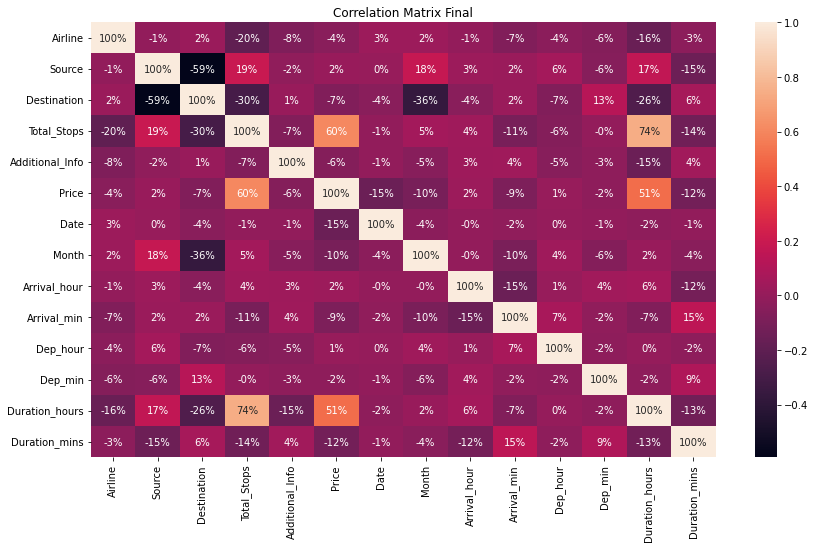

In [105]:
# Correlation matrix
# Visualization for train dataset
plt.figure(figsize=(14,8))
sns.heatmap(data_train.corr(), annot= True, fmt='.0%')
plt.title("Correlation Matrix Final")
plt.show()

Now data looks good, let's move ahead for model building with this data set.



As our dataset was a categorical dataset, Their is no point of checking for skewness and outlier's . Also we did encoding already, so there is no point of scaling our dataset. So let's move ahead and Build our ML Model for this regression problem.


# skewness

In [139]:
data_train.skew()

Airline            0.731095
Source            -0.424054
Destination        1.244169
Total_Stops        0.317049
Additional_Info   -2.114551
Price              1.812552
Date               0.118351
Month             -0.387493
Arrival_hour      -0.369988
Arrival_min        0.110945
Dep_hour           0.113073
Dep_min            0.167029
Duration_hours     0.850862
Duration_mins     -0.090841
dtype: float64

In [142]:
from sklearn.preprocessing import PowerTransformer
pwrTrans=PowerTransformer(method='yeo-johnson')  
feature=['Destination','Additional_Info','Duration_hours']
data_train[feature]=pwrTrans.fit_transform(data_train[feature].values)


In [143]:
# Separating Features and Labels

X=data_train.drop('Price', axis=1)
y= data_train.Price

In [144]:
X.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,3,0,1.752703,0,0.523751,24,3,1,10,22,20,-1.175709,50
1,1,3,-1.370545,2,0.523751,1,5,13,15,5,50,-0.055425,25


In [145]:
y.head(2)

0    3897.0
1    7662.0
Name: Price, dtype: float64

In [146]:
# dimensions
X.shape

(10683, 13)

In [147]:
y.shape

(10683,)

It looks good so far, let's move ahead with Model Building



# Model Building

In [148]:
# Importing basic libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

#Model library
from sklearn.linear_model import LinearRegression

#metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#scale
from sklearn.preprocessing import StandardScaler

# we will scale our dataset for Linear Regression, as this model is very sensitive towards scaling

scalar= StandardScaler()

In [149]:
# scaling features
X_scaled=scalar.fit_transform(X)            # will use this in linear regression and Lasso

X_scaled.shape

(10683, 13)

# VIF 

To check for multicolinearity if any present in our dataset.

In [150]:
#finding variance inflation factor in each scaled column i.e X_scaled.shape[1] (1/1-R2): here R2=actual-predicted
#this method help us to identify multicollinearity.

# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [151]:
vif=pd.DataFrame()
vif["vif"]= [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns

#let's check the values
vif

,vif,Features
0,1.082904,Airline
1,1.770609,Source
2,2.009985,Destination
3,3.392013,Total_Stops
4,1.070915,Additional_Info
5,1.006401,Date
6,1.109947,Month
7,1.048183,Arrival_hour
8,1.088522,Arrival_min
9,1.034501,Dep_hour


We can observe that all the values are well below 5, so there is no multicollinearity present in this dataset, we are safe to move ahead and build our regression model.


# Spliting train and test data

In [152]:
# splitting into train data and test data, will take 20% for testing purpose

X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=.20, random_state=50)


# Linear Regression

In [208]:
# ML Model
LR= LinearRegression()

#fit
LR.fit(X_train,y_train)

#predict
y_pred= LR.predict(X_test)
pred=LR.predict(X_train)

print("--------- Train score---------")
LR_train_MAE= round(mean_absolute_error(y_train, pred), 2)
LR_train_avg_MAE= LR_train_MAE/(max(y)-min(y))
LR_train_R2 = round(r2_score(y_train, pred), 4)
LR_train_RMSE=(np.sqrt(mean_squared_error(y_train, pred))/(max(y)-min(y)))         

print(f" R^2 Score : {LR_train_R2}\n")
print(f" MAE score avg : {LR_train_avg_MAE}\n")
print(f" RMSE score avg : {LR_train_RMSE}\n")
                    

#score variables
LR_R2= round(r2_score(y_test, y_pred), 4);
LR_MAE=(mean_absolute_error(y_test, y_pred)/(max(y)-min(y)))
LR_RMSE=(np.sqrt(mean_absolute_error(y_test,y_pred)))/(max(y)-min(y))  
                  

print("---------------Test Score-------------")
print(f" R^2 Score : {LR_R2}\n")
print(f" MAE score avg : {LR_MAE}\n")
print(f" RMSE score avg : {LR_RMSE}\n")
                    


--------- Train score---------
 R^2 Score : 0.4593

 MAE score avg : 0.03038673748922871

 RMSE score avg : 0.04363430513071227

---------------Test Score-------------
 R^2 Score : 0.4516

 MAE score avg : 0.03064934213779601

 RMSE score avg : 0.0006278443657084228



In [214]:
# cross validation
from sklearn.model_selection import cross_val_score
LR= LinearRegression()
scores= cross_val_score(LR, X_train, y_train, scoring='r2', cv=10)
LR_CS=scores.mean()
print("Cross validation score is : ", LR_CS)

Cross validation score is :  0.46181062962134983


This model did not fit right for our dataset



# Ensemble Technique

In [209]:
from sklearn.ensemble import RandomForestRegressor

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=42)
#Model
RFR=RandomForestRegressor()

#fit 
RFR.fit(X_train,y_train)

#predict
y_pred= RFR.predict(X_test)
pred=RFR.predict(X_train)

print("--------- Train score---------")
RFR_train_R2= round(r2_score(y_train, pred), 4)
RFR_train_MAE=(mean_absolute_error(y_train,pred))/(max(y)-min(y))
RFR_train_RMSE=(np.sqrt(mean_squared_error(y_train,pred)))/(max(y)-min(y))

print(f" R^2 Score : {RFR_train_R2}\n")
print(f" MAE avg score : {RFR_train_MAE}\n")
print(f" RMSE avg score : {RFR_train_RMSE}\n")

#score variables
RFR_R2= round(r2_score(y_test, y_pred), 4)
RFR_MAE=(mean_absolute_error(y_test,y_pred))/(max(y)-min(y))
RFR_RMSE=(np.sqrt(mean_squared_error(y_test,y_pred)))/(max(y)-min(y))
print("---------------Test Score-------------")
print(f" R^2 Score : {RFR_R2}\n")
print(f" MAE avg score : {RFR_MAE}\n")
print(f" RMSE avg score : {RFR_RMSE}\n")




--------- Train score---------
 R^2 Score : 0.9812

 MAE avg score : 0.0034765309639770226

 RMSE avg score : 0.008145432610389507

---------------Test Score-------------
 R^2 Score : 0.8506

 MAE avg score : 0.008773699540028818

 RMSE avg score : 0.022866000095476072



In [216]:
# cross validation
RFR= RandomForestRegressor()
scores= cross_val_score(RFR, X_train, y_train, scoring='r2', cv=10)
RFR_CS=scores.mean()
print("Cross validation score is : ", RFR_CS)

Cross validation score is :  0.8826376271667578


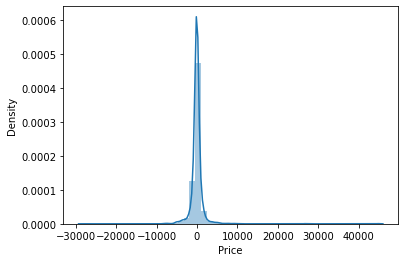

In [210]:
sns.distplot(y_test-y_pred)
plt.show()

<AxesSubplot:xlabel='Price'>

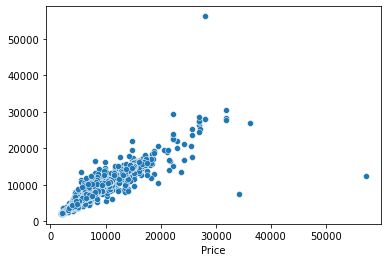

In [211]:
sns.scatterplot(y_test,y_pred)

We can say that both predicted data and actual data lies in same line mostly

In [234]:
# Hyper Parameter Tunning
# Create the random grid

random_grid = {'n_estimators': range(100,1200,100),
               'max_features':['auto', 'sqrt'] ,
               'max_depth': range(5,30,5),
               'min_samples_split': [2, 5, 10, 15, 100],
               'min_samples_leaf':[1, 2, 5, 10] }

#grid_search=GridSearchCV(estimator=RFR, param_grid= random_grid, cv=5)

#grid_search.fit(X_train,y_train)

#grid_search.best_estimator_

rnd_srch=RandomizedSearchCV(RandomForestRegressor(), cv=5, param_distributions= random_grid)

rnd_srch.fit(X_train,y_train)

rnd_srch.best_estimator_

RandomForestRegressor(max_depth=25, max_features='auto', min_samples_split=10,
                      n_estimators=400)

In [235]:
#GCV_pred= grid_search.best_estimator_.predict(X_test) 

prediction=rnd_srch.best_estimator_.predict(X_test)
print("Post tuning scores")

#score variables
R2= round(r2_score(y_test, prediction), 4)
MAE=(mean_absolute_error(y_test,prediction))/(max(y)-min(y))
RMSE=(np.sqrt(mean_squared_error(y_test,prediction)))/(max(y)-min(y))
print("---------------Test Score-------------")
print(f" R^2 Score : {R2}\n")
print(f" MAE avg score : {MAE}\n")
print(f" RMSE avg score : {RMSE}\n")




Post tuning scores
---------------Test Score-------------
 R^2 Score : 0.8584

 MAE avg score : 0.009527573658956389

 RMSE avg score : 0.022267119463832415



we did RandomizedSearchCV for parameter tuning, as our data set is big, and it is faster then GridSearchCV. We can see that their is slight improvement in the metrics of the model after parameter tuning.

# LASSO

In [165]:
from sklearn.linear_model import Lasso

In [212]:
#model
LS=Lasso(alpha=0.05)
#fit 
LS.fit(X_train,y_train)

#predict
y_pred= LS.predict(X_test)
pred=LS.predict(X_train)

print("--------- Train score---------")
LS_train_R2= round(r2_score(y_train, pred), 4)
LS_train_MAE=(mean_absolute_error(y_train,pred))/(max(y)-min(y))
LS_train_RMSE=(np.sqrt(mean_squared_error(y_train,pred)))/(max(y)-min(y))

print(f" R^2 Score : {LS_train_R2}\n")
print(f" MAE avg score : {LS_train_MAE}\n")
print(f" RMSE avg score : {LS_train_RMSE}\n")


#score variables
LS_MAE= (mean_absolute_error(y_test, y_pred))/(max(y)-min(y))   # we are calculating avg MAE
LS_R2= round(r2_score(y_test, y_pred), 4)
LS_RMSE=(np.sqrt(mean_squared_error(y_test,y_pred)))/(max(y)-min(y))
                         # calculating avg RMSE
print("\n-------------Test Score---------------\n")
print(f" R^2 Score : {LS_R2}\n")
print(f" Mean Absolute Error avg : {LS_MAE}\n")
print(f" Root Mean Squared Error avg: {LS_RMSE}\n")


--------- Train score---------
 R^2 Score : 0.4593

 MAE avg score : 0.030386680196087302

 RMSE avg score : 0.043634305163142005


-------------Test Score---------------

 R^2 Score : 0.4516

 Mean Absolute Error avg : 0.030649236401452264

 Root Mean Squared Error avg: 0.043814513928895384



We can observe that both the linear model is not giving high scores for prediction, But randomForest works very well.

In [217]:
# cross validation
LS= Lasso()
scores= cross_val_score(LS, X_train, y_train, scoring='r2', cv=10)
LS_CS=scores.mean()
print("Cross validation score is : ", LS_CS)

Cross validation score is :  0.461816333675441


Looks like this is not our model , as we already got better score with RandomForestRegressor

# AdaBoostRegressor

In [218]:
from sklearn.ensemble import AdaBoostRegressor

#  Model
ADA= AdaBoostRegressor()

#fit 
ADA.fit(X_train,y_train)

#predict 
y_pred=ADA.predict(X_test)
pred=ADA.predict(X_train)

print("--------- Train score---------")
ADA_train_R2= round(r2_score(y_train, pred), 4)
ADA_train_MAE=(mean_absolute_error(y_train,pred))/(max(y)-min(y))
ADA_train_RMSE=(np.sqrt(mean_squared_error(y_train,pred)))/(max(y)-min(y))

print(f" R^2 Score : {ADA_train_R2}\n")
print(f" MAE avg score : {ADA_train_MAE}\n")
print(f" RMSE avg score : {ADA_train_RMSE}\n")


#score variables
ADA_MAE= (mean_absolute_error(y_test, y_pred))/(max(y)-min(y))   # we are calculating avg MAE
ADA_R2= round(r2_score(y_test, y_pred), 4)
ADA_RMSE=(np.sqrt(mean_squared_error(y_test,y_pred)))/(max(y)-min(y))
                         # calculating avg RMSE
print("\n-------------Test Score---------------\n")
print(f" R^2 Score : {ADA_R2}\n")
print(f" Mean Absolute Error avg : {ADA_MAE}\n")
print(f" Root Mean Squared Error avg: {ADA_RMSE}\n")


--------- Train score---------
 R^2 Score : 0.4308

 MAE avg score : 0.03736829965077358

 RMSE avg score : 0.044769617771578785


-------------Test Score---------------

 R^2 Score : 0.4078

 Mean Absolute Error avg : 0.037625520481682016

 Root Mean Squared Error avg: 0.045530534394400406



In [219]:
# Cross validation
scores= cross_val_score(ADA, X_train, y_train, scoring='r2', cv=10)
ADA_CS=scores.mean()
print("Cross validation score is : ", ADA_CS)

Cross validation score is :  0.41962019315859694


We can observe that the scores here is also not so great, as compared to previous models. So far RandomForest works better with our dataset.

# XGBoostRegressor

In [220]:
import xgboost as XGB
#model
XGB = XGB.XGBRegressor()

#fit
XGB.fit(X_train,y_train)

#predict 
y_pred=XGB.predict(X_test)
pred=XGB.predict(X_train)

print("--------- Train score---------")
XGB_train_R2= round(r2_score(y_train, pred), 4)
XGB_train_MAE=(mean_absolute_error(y_train,pred))/(max(y)-min(y))
XGB_train_RMSE=(np.sqrt(mean_squared_error(y_train,pred)))/(max(y)-min(y))

print(f" R^2 Score : {XGB_train_R2}\n")
print(f" MAE avg score : {XGB_train_MAE}\n")
print(f" RMSE avg score : {XGB_train_RMSE}\n")


#score variables
XGB_MAE= (mean_absolute_error(y_test, y_pred))/(max(y)-min(y))   # we are calculating avg MAE
XGB_R2= round(r2_score(y_test, y_pred), 4)
XGB_RMSE=(np.sqrt(mean_squared_error(y_test,y_pred)))/(max(y)-min(y))
                         # calculating avg RMSE
print("\n-------------Test Score---------------\n")
print(f" R^2 Score : {XGB_R2}\n")
print(f" Mean Absolute Error avg : {XGB_MAE}\n")
print(f" Root Mean Squared Error avg: {XGB_RMSE}\n")


--------- Train score---------
 R^2 Score : 0.9752

 MAE avg score : 0.00597909624175049

 RMSE avg score : 0.009349548980766896


-------------Test Score---------------

 R^2 Score : 0.8877

 Mean Absolute Error avg : 0.009611924744748543

 Root Mean Squared Error avg: 0.01982437189520978



In [221]:
# Cross Validation
scores= cross_val_score(XGB, X_train, y_train, scoring='r2', cv=10)
XGB_CS=scores.mean()
print("Cross validation score is : ", XGB_CS)

Cross validation score is :  0.8830872534156817


In [231]:
# Hyper parameter Tuning

parameter= {'gamma':range(0,10,2),
           'max_depth': range(4,14,2),
           'feature_selector': ['cyclic','shuffle','random','greedy']}

grid_search=GridSearchCV(estimator=XGB, param_grid= parameter, cv=5)

grid_search.fit(X_train,y_train)

grid_search.best_estimator_


[12:23:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:23:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:23:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[12:23:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:23:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:23:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[12:23:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:23:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:23:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[12:24:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[12:24:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[12:24:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[12:24:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[12:24:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[12:25:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[12:25:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[12:25:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[12:26:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:26:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:26:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[12:26:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:26:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:26:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[12:26:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:26:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:26:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[12:26:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:26:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:26:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[12:27:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:27:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:27:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[12:27:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:27:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:27:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[12:27:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:27:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:27:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[12:27:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:27:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:27:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[12:27:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:27:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:27:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[12:28:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:28:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:28:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[12:28:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:28:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:28:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[12:28:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:28:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:28:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[12:28:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:28:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:28:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[12:29:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:29:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:29:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be 

[12:29:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "feature_selector" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_selector='cyclic', gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [232]:
prediction= grid_search.best_estimator_.predict(X_test) 

print("Post tuning scores")

#score variables
R2= round(r2_score(y_test, prediction), 4)
MAE=(mean_absolute_error(y_test,prediction))/(max(y)-min(y))
RMSE=(np.sqrt(mean_squared_error(y_test,prediction)))/(max(y)-min(y))
print("---------------Test Score-------------")
print(f" R^2 Score : {R2}\n")
print(f" MAE avg score : {MAE}\n")
print(f" RMSE avg score : {RMSE}\n")




Post tuning scores
---------------Test Score-------------
 R^2 Score : 0.8877

 MAE avg score : 0.009611924744748543

 RMSE avg score : 0.01982437189520978



In [233]:
train_pred=grid_search.best_estimator_.predict(X_train)
print("Post Tuning score for train data")
r2_score(y_train,train_pred)

Post Tuning score for train data


0.9751738166788715

We can observe that even after hyper tuning the metrics score are nearly same, let's plot the graph


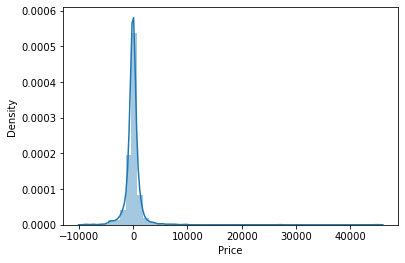

In [239]:
sns.distplot(y_test-prediction)
plt.show()

We can observe that both the data are almost in line. We can further chcek it using scatter plot

<AxesSubplot:xlabel='Price'>

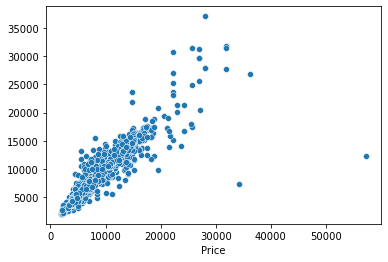

In [240]:
sns.scatterplot(y_test,prediction)

Both the data are highly in line, The model works decently with our dataset. It can be our final model.




# Summarizing each model

In [241]:
# Summarizing each model

MAE=[LR_MAE,RFR_MAE,LS_MAE,XGB_MAE,ADA_MAE]
R2= [LR_R2,RFR_R2,LS_R2,XGB_R2,ADA_R2]
RMSE=[LR_RMSE,RFR_RMSE,LS_RMSE,XGB_RMSE,ADA_RMSE]
Cross_score= [LR_CS,RFR_CS,LS_CS,XGB_CS,ADA_CS]

Model= pd.DataFrame({
    'Models':['Linear Regression', 'Random Forest Regressor', 'Lasso Regressor', 'XGBoost Regressor', 'AdaBoost Regressor'],
    'MAE': MAE, 'R^2' :R2,'RMSE': RMSE, 'Cross Validation Score': Cross_score })

Model.sort_values(by ='R^2', ascending = False )


,Models,MAE,R^2,RMSE,Cross Validation Score
3,XGBoost Regressor,0.009612,0.8877,0.019824,0.883087
1,Random Forest Regressor,0.008774,0.8506,0.022866,0.882638
0,Linear Regression,0.030649,0.4516,0.000628,0.461811
2,Lasso Regressor,0.030649,0.4516,0.043815,0.461816
4,AdaBoost Regressor,0.037626,0.4078,0.045531,0.419620


From here its clear that the Best Model is XGBoostRegressor,for our dataset. As it's score is better, the error value is also minimum. We already did Hyper parameter tuning for this model. And it works well with our train and testing data.


Let's save the Model and then we will do prediction for test dataset.



# Saving the Model

In [236]:
# saving best performing model and saving the model to disk
import pickle
filename= "Flight_Price_prediction.sav"
pickle.dump(XGB, open(filename, 'wb'))

We save the XGboost Model for test data prediction with file name as Flight_Price_Prediction.sav

For Predicting the test dataset, we need to open the model in rb mode and then we can predict the results.



# Predicting test dataset using above model

In [237]:
#load the model from disk.
loaded_model= pickle.load(open(filename,'rb'))

result= loaded_model.predict(data_test)

In [238]:
result

array([15156.597,  7899.093, 16645.354, ..., 18176.443, 10873.951,
        7986.533], dtype=float32)

result is our predicted Flight Ticket Price.